# <font color='red'> Project 1 Akash Gupta - AXG170018 & Eshaan Thakar - EAT170005

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Regression Task:
### Datset: House Prices: Advanced Regression Techniques
### Regression Problem: Predict sales prices of Iowa Housing.
### Source: Kaggle-Competition Dataset
## Evaluation Strategy used is based on Avg Training Score,Avg Testing Score and the best RMSE value 
## Model Evaluation Technique:  Cross Validation and Grid Search to get the best Hyperparameters

### Importing the Libraries that are Required and Setting Global Values:

In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression, SGDRegressor
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## IMPORT DATASET

A first look at the data and a validation strategy
The goal here is only to get an idea about the structure, the data types, the missing values. We should try to not take any decisions just yet because we did not set up any validation strategy yet.

Note also that we do not load the test set, for the purposes of this notebook the test set is needed only for the final submission. Imagine the test set as the one that your client sends you a month after you delivered your model.

In [13]:
df=pd.read_csv("train.csv")

In [14]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.shape

(1460, 81)

## we have a good combination of numerical, ordinal, and categorical features (which is also why this is a good competition to start with). We also have quite a few missing values (most of which are explained in the data description).

## Now we will check for % of missing values in the entire dataset

In [16]:
print("Percentage missing values across the dataset: %5.4f" % (df.isna().mean().mean()*100),"%", sep='')

Percentage missing values across the dataset: 5.8896%


## We can see that our dataset has 5.8896% of missing values in total 

  ### Now we will check missing values across each column:

In [17]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [18]:
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

In [19]:
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


## Now we check the Distribution of Data amongst each of the columns in the data

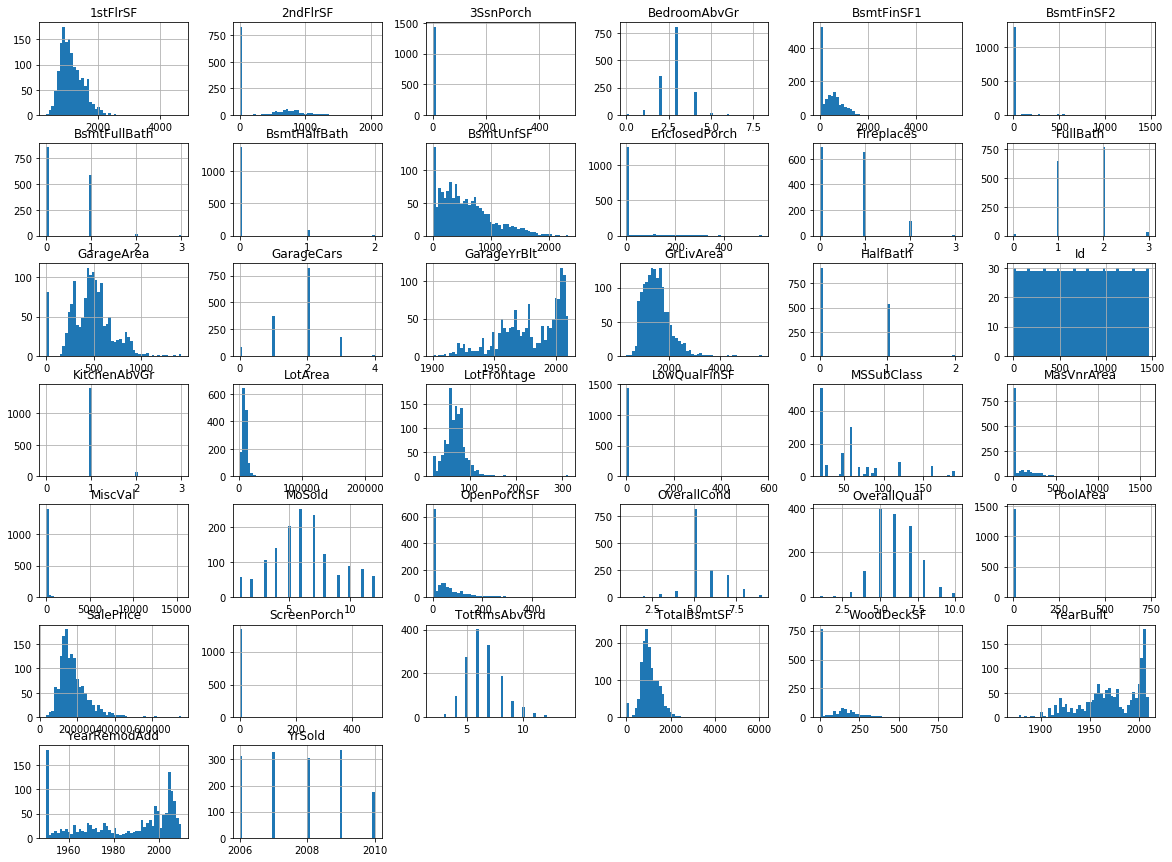

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## All the information I want to get from these plots are about odd distributions, not only I see there is a skew in some continuous variables, but also that some features have mostly one value.

### One way to remove the skeweness is to simply take the logarithm of the variable.
# This is what we are going to do now with the target variable : SalePrice

Text(0.5, 1.0, 'SalePrice before Log Transformation')

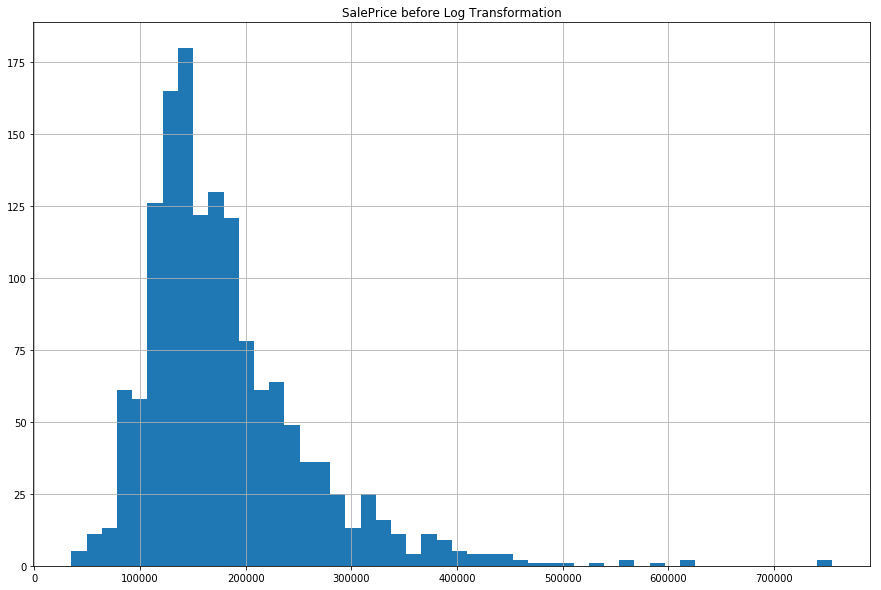

In [21]:
df.SalePrice.hist(bins=50, figsize=(15,10))
plt.title("SalePrice before Log Transformation")

## Sales Price After Log Transformation Distribution :

In [22]:
df['target'] = np.log1p(df.SalePrice)
del df['SalePrice']

Text(0.5, 1.0, 'SalePrice after Log Transformation')

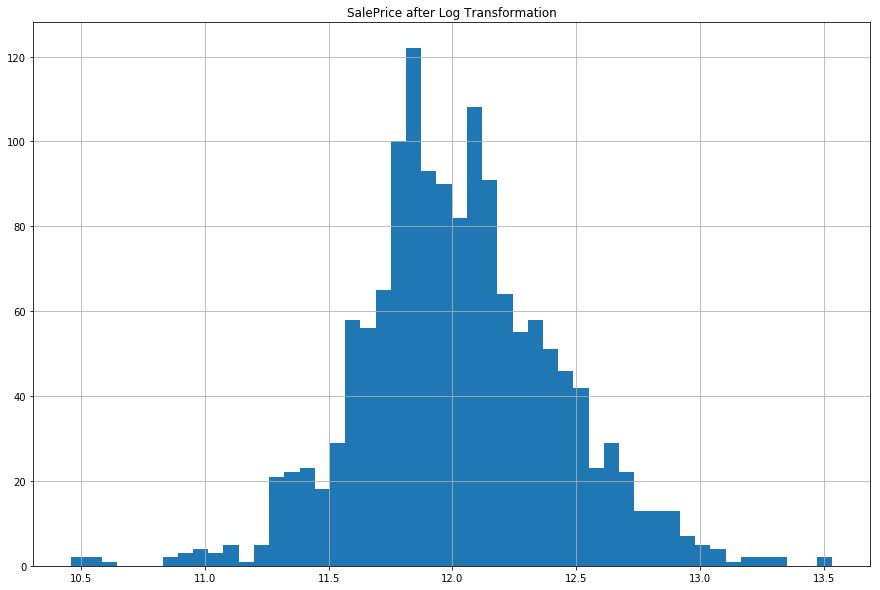

In [23]:
df.target.hist(bins=50, figsize=(15,10))
plt.title("SalePrice after Log Transformation")

In [286]:
df.OverallQual.head(2)

0    7
1    6
Name: OverallQual, dtype: int64

In [27]:
count=0
for column in df.columns:
    if df[column].dtype == object:
        count=count+1
        print("'"+column+"'",end=',')

'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition',

In [28]:
print("Number of Categorical Variables: ",count)

Number of Categorical Variables:  43


In [29]:
list3=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition',]

## In order to get list of names of all Continuous Variables 

In [24]:
count_cont=0
for column in df.columns:
    if df[column].dtype != object:
        count_cont=count_cont+1
        print("'"+column+"'",end=',')

'Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','target',

In [26]:
print("Number of Continuos Variables: ",count_cont)

Number of Continuos Variables:  38


In [30]:
list2=['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','target']

# Now we start the process of feature engineering and Exploratory Data Analysis which will help us understand our categorical variables.

## Now we will remove all "na" values and impute na's with values based on the data behaviour such as mean.

### We have imputed all na values for Alley to "No Alley Access" which suggests that there is no alley in houses and we assign value according to that.Similarly Seeeing the documentation of the dataset we replaced categorical values which are missing as No Alley instead of removing them completely.

We can see that categorical columns Alley, FireplaceQu, PoolQC, Fence & MiscFeature have nan values.<br />
For Alley column NaN means No alley access. So here we can impute NaN with new category No alley access.<br />
For FireplaceQu column NaN is No Fireplace. So here we can impute NaN with new category No Fireplace.<br />
For PoolQC column NaN is No Pool. So here we can impute NaN with new category No Pool.<br />
For Fence column NaN is No Fence. So here we can impute NaN with new category No Fence.<br />
For MiscFeature column NaN means No features like Elevator, tennis court, shed etc. So here we can impute NaN with new category No MiscFeature.<br />
For Utilities column we don't know what NaN means. So here since its a categorical column we can impute NaN with mode value.<br />

In [31]:
df.Alley.replace(np.nan,"No Alley Access", inplace = True)
df.Alley.unique()

array(['No Alley Access', 'Grvl', 'Pave'], dtype=object)

In [32]:
df.FireplaceQu.replace(np.nan,"No Fireplace", inplace = True)
df.FireplaceQu.unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [33]:
df.PoolQC.replace(np.nan,"No Pool", inplace = True)
df.PoolQC.unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [34]:
df.Fence.replace(np.nan,"No Fence", inplace = True)
df.Fence.unique()

array(['No Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [35]:
df.MiscFeature.replace(np.nan,"No MiscFeature", inplace = True)
df.MiscFeature.unique()

array(['No MiscFeature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [36]:
df.BsmtCond.replace(np.nan, "No Basement", inplace = True)
df.BsmtCond.unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [37]:
df.BsmtExposure.replace(np.nan, "No Basement", inplace = True)
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'No Basement'], dtype=object)

In [38]:
df.BsmtFinType1.replace(np.nan, "No Basement", inplace = True)
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [39]:
df.BsmtFinType2.replace(np.nan, "No Basement", inplace = True)
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'No Basement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [40]:
df.BsmtQual.replace(np.nan, "No Basement", inplace = True)
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [41]:
df.Electrical.replace(np.nan, df.Electrical.mode()[0], inplace = True)
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [42]:
df.Exterior1st.replace(np.nan, df.Exterior1st.mode()[0], inplace = True)
df.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [43]:
df.Exterior2nd.replace(np.nan, df.Exterior2nd.mode()[0], inplace = True)
df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [44]:
df.Functional.replace(np.nan, df.Functional.mode()[0], inplace = True)
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [45]:
df.GarageFinish.replace(np.nan, "No Garage", inplace = True)
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [46]:
df.GarageQual.replace(np.nan, "No Garage", inplace = True)
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [47]:
df.GarageQual.replace(np.nan, "No Garage", inplace = True)
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [48]:
df.GarageType.replace(np.nan, "No Garage", inplace = True)
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

In [49]:
df.GarageCond.replace(np.nan, "No Garage", inplace = True)
df.GarageCond.unique()

array(['TA', 'Fa', 'No Garage', 'Gd', 'Po', 'Ex'], dtype=object)

In [50]:
df.KitchenQual.replace(np.nan, "TA", inplace = True)
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [51]:
df.MSZoning.replace(np.nan, df.MSZoning.mode()[0], inplace = True)
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [52]:
df.MasVnrType.replace(np.nan, df.MasVnrType.mode()[0], inplace = True)
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [53]:
df.SaleType.replace(np.nan, df.SaleType.mode()[0], inplace = True)
df.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [54]:
df.Utilities.replace(np.nan, df.Utilities.mode()[0], inplace = True)
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

## CentralAir coulmn has only Y/N values so we cant encode them directly as Y=1 and N=0

In [55]:
df.CentralAir.replace("N", 0, inplace = True)
df.CentralAir.replace("Y", 1, inplace = True)
df.CentralAir.unique()

array([1, 0])

### This the final dataset we get which has categorical columns without na values

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


In [56]:
df.shape

(1460, 81)

## Now we work for continuos variables 
### We first look for na values in columns and impute them with mean values of that column.
#### Here we can see that " LotFrontage " ," GarageYrBlt " and " MasVnrArea " have na values which are imputed with the mean value of the respective columns.

In [62]:
df.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
target            0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
YearRemodAdd      0
YearBuilt         0
Heating           0
Utilities         0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
Alley             0
LotShape          0
               ... 
PoolArea          0
GarageCars        0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
GarageArea        0
GarageFinish      0
CentralAir        0
FullBath          0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0


## Filling Na values with mean values

In [63]:
new_df=df.fillna(df.mean())

In [64]:
new_df.shape

(1460, 81)

In [65]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


# We can see now we have no Na values in the dataset

In [66]:
new_df.isna().sum().sort_values(ascending=False)

target          0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

## Now we will do Exploratory Data Analaysis to check whether we shoud one hot encode or prefer label encoding for our independant variables.

### If the distribution of that feature lies pretty far from the mean distribution of different levels in a category we will have to do Label encoding as then we will treat that feature as Ordinal.
### Otherwise we will treat that feature as Nominal and One hot Encode it.

# In order to show you we do a scatterplot of the Independant feature "MSZoning" with the Dependant variable SalePrice(earlier) now "target"

In [68]:
new_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [70]:
          ###### DATA DESCRIPTION
    
  # A    Agriculture
  # C    Commercial
  # FV   Floating Village Residential
  # I    Industrial
  # RH   Residential High Density
  # RL   Residential Low Density
  # RP   Residential Low Density Park 
  # RM   Residential Medium Density


# MSZoning

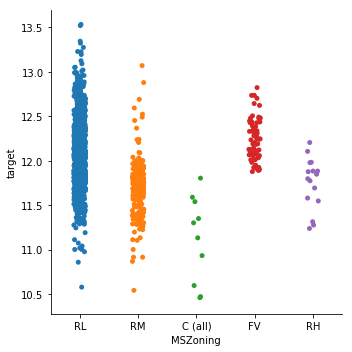

In [59]:
import seaborn as sns
sns.catplot(x="MSZoning", y="target", data=new_df);

## Seeing the above plot we conclude that we will treat this as Nominal because the variation in the mean values for each leve within this variable is not too far from each other.

# Street

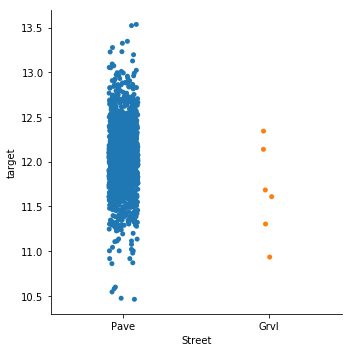

In [60]:
import seaborn as sns
sns.catplot(x="Street", y="target", data=new_df);

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


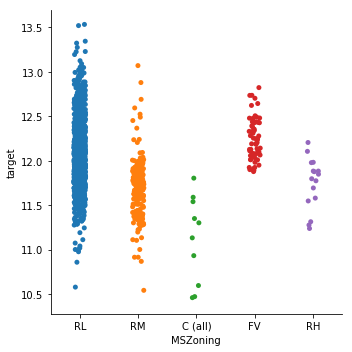

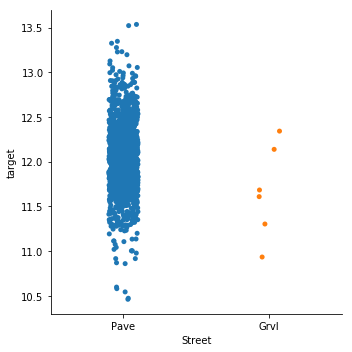

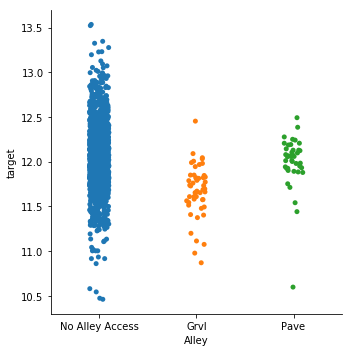

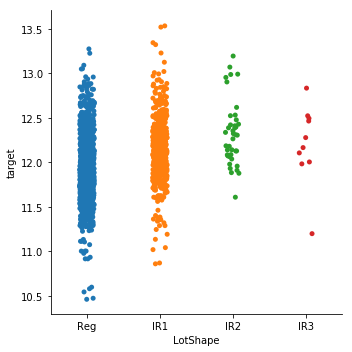

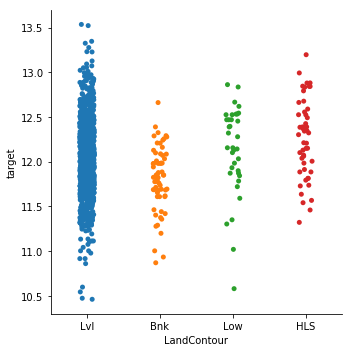

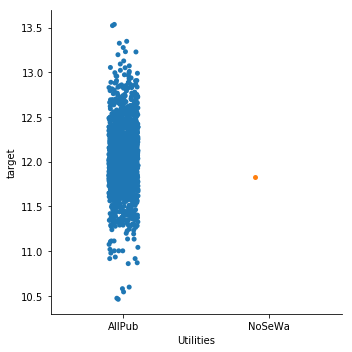

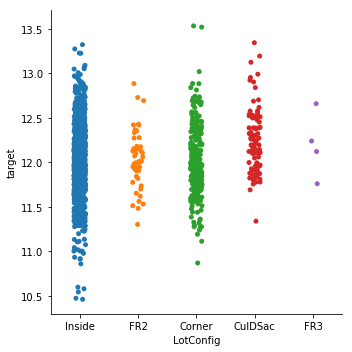

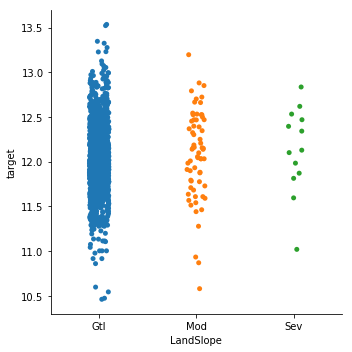

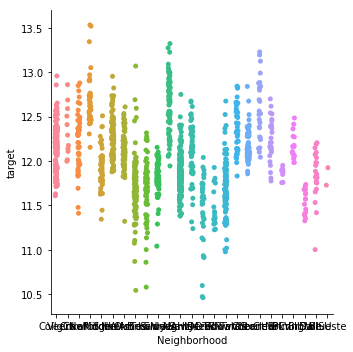

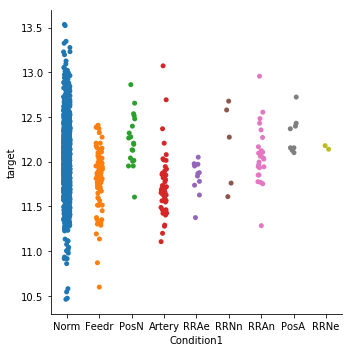

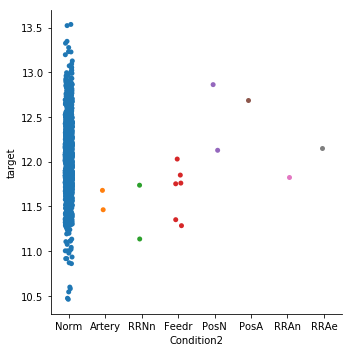

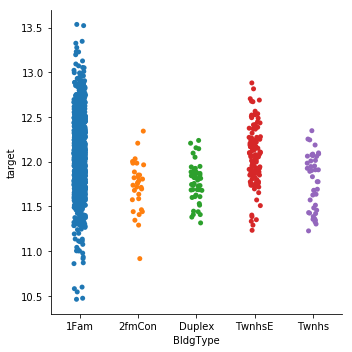

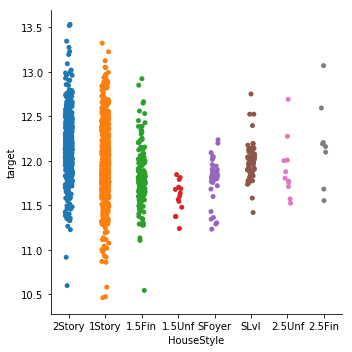

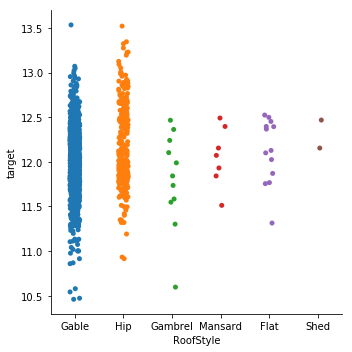

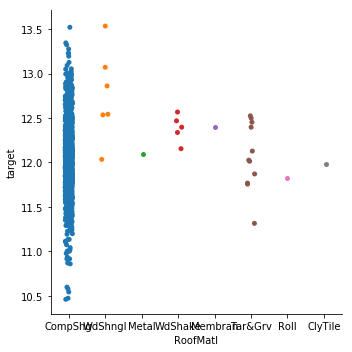

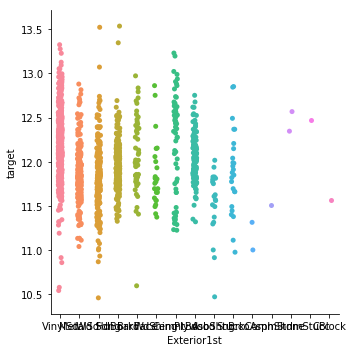

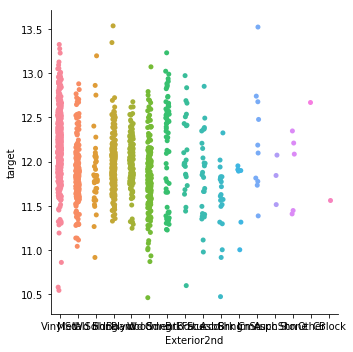

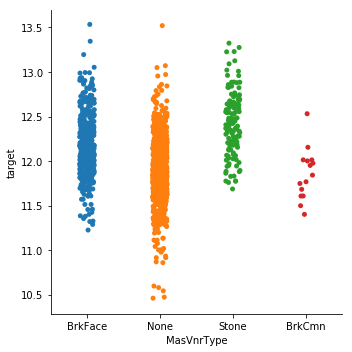

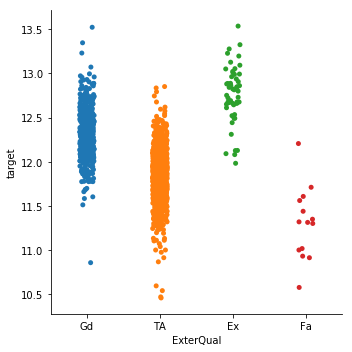

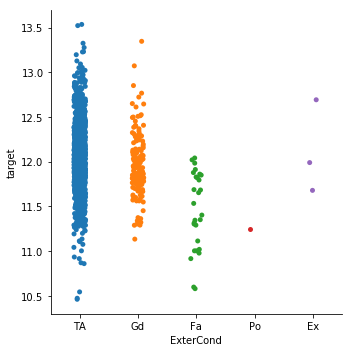

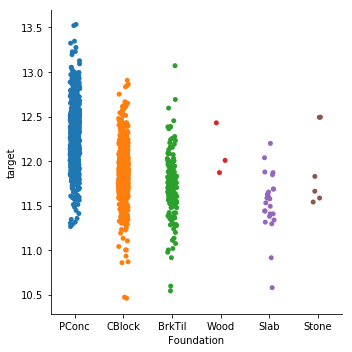

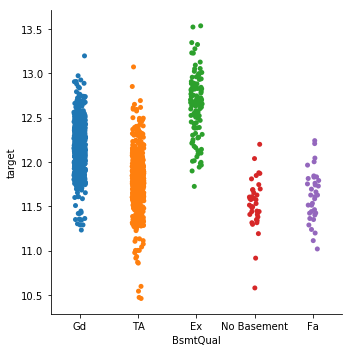

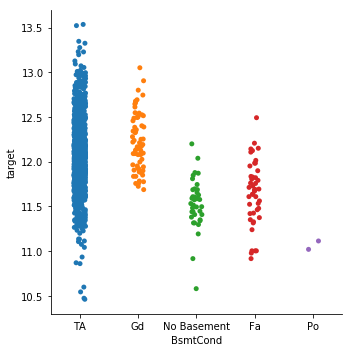

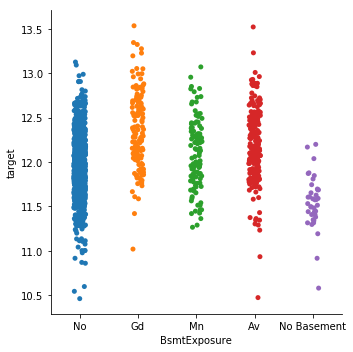

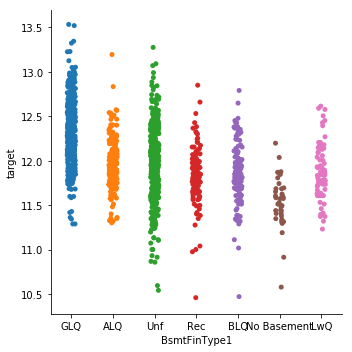

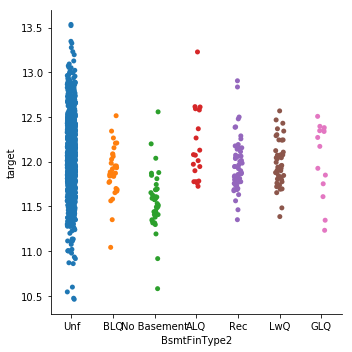

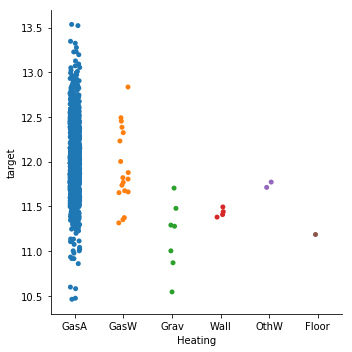

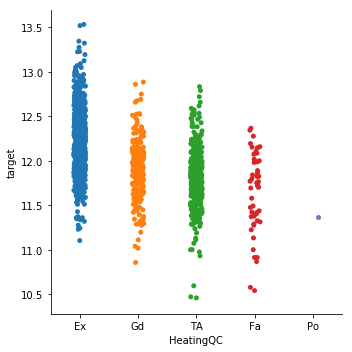

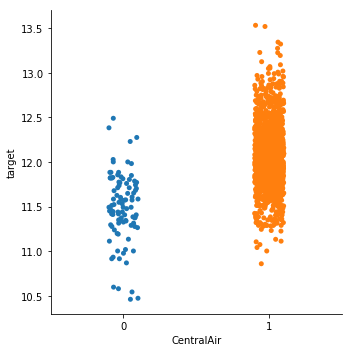

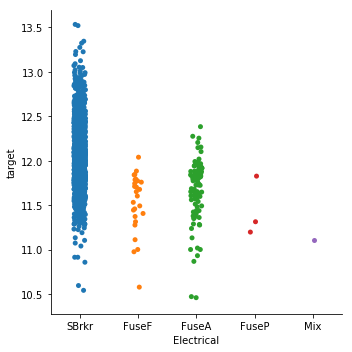

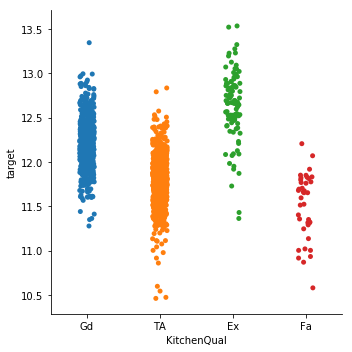

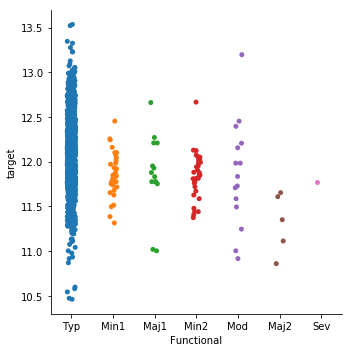

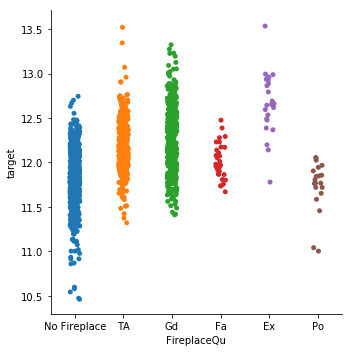

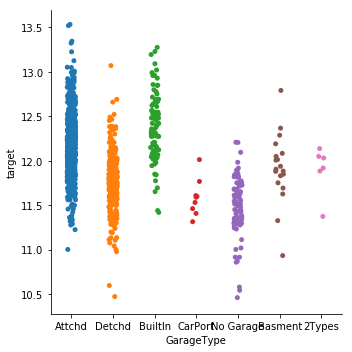

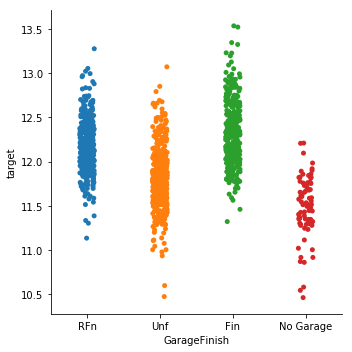

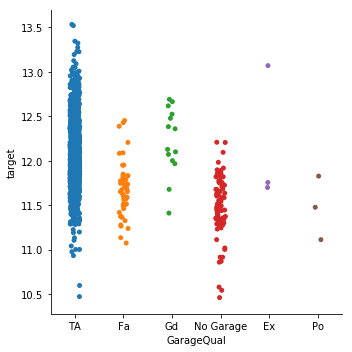

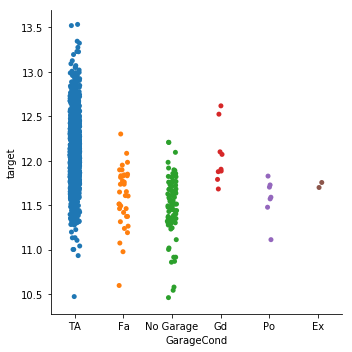

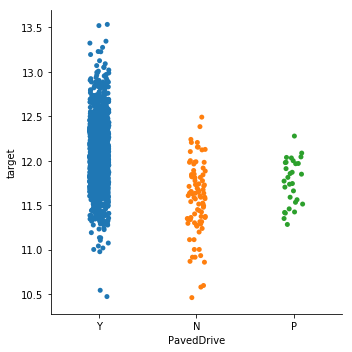

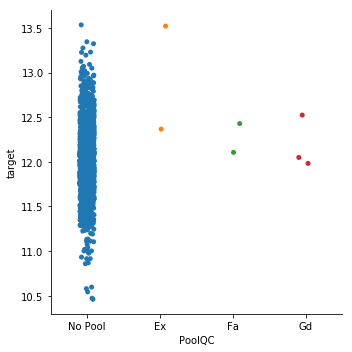

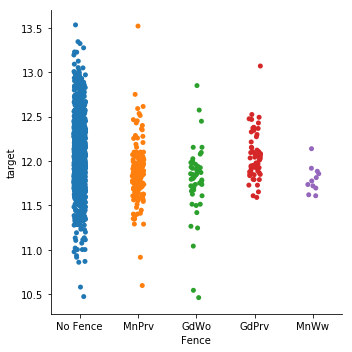

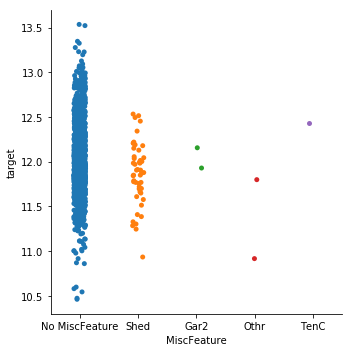

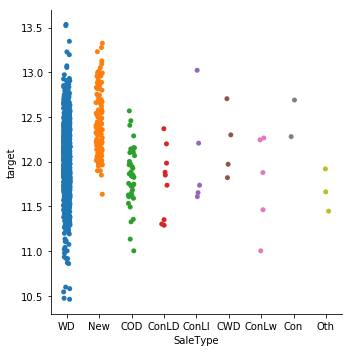

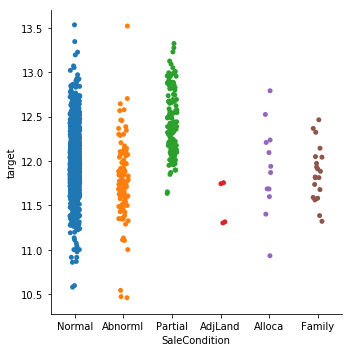

In [75]:
#list3 is the list with all names of categorical columns and we explore ere which columns should be taken as 
#ordinal and which ones should be taken as nominal .
for col in list3:
    sns.catplot(x=col, y="target", data=new_df);

## Now we check the mean values whether our plotted data has significantly different mean values for each level in a category which will help us in knowing which column would be suitable for label encoding and which one for one hot encoding.

In [76]:
lst_means = []
for column in list3:
    print(new_df[["target",column]].groupby(column).mean())
    #lst_means.append(df[["target",column]].groupby(column).mean()['target'].tolist())
    #print(pd.Series(lst_means[-1],index=df[column].unique()))

             target
MSZoning           
C (all)   11.118275
FV        12.246621
RH        11.749848
RL        12.085891
RM        11.692901
           target
Street           
Grvl    11.667444
Pave    12.025529
                    target
Alley                     
Grvl             11.673363
No Alley Access  12.037682
Pave             11.996819
             target
LotShape           
IR1       12.163471
IR2       12.318455
IR3       12.205419
Reg       11.936101
                target
LandContour           
Bnk          11.810748
HLS          12.259262
Low          12.120092
Lvl          12.022700
              target
Utilities           
AllPub     12.024189
NoSeWa     11.831386
              target
LotConfig           
Corner     12.027452
CulDSac    12.249815
FR2        12.034748
FR3        12.195689
Inside     12.001906
              target
LandSlope           
Gtl        12.020571
Mod        12.076873
Sev        12.130567
                 target
Neighborhood           
Blmngtn    

## Now we check for continuos variables for outliers using simple describe function to understand their distribution from mean 

In [77]:
new_df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,No Alley Access,Reg,Lvl,AllPub,...,NaN,No Pool,No Fence,No MiscFeature,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,...,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024057
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399449
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460271
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775105
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001512
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273736


# We notice that we have few columns which are having min and max values which are 3 Std Deviations far from the mean values.
## We also have to keep in mind the size of our dataset.We cannot trade off data at this time with these continuous values.

### For continuous data we now check mean and using this we will check for outliers .If value lies beyong 3 std deviations from the mean we should consider it as an outlier.

In [91]:
new_df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,No Alley Access,Reg,Lvl,AllPub,...,NaN,No Pool,No Fence,No MiscFeature,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,...,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024057
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399449
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460271
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775105
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001512
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273736


In [92]:
new_df.shape

(1460, 81)

## We will check for outiers and how much is it affecting size of the data 

In [97]:
## Now removing the outliers and keeping data in a new dataframe
Cont_clean=new_df

In [106]:
from scipy import stats

def drop_numerical_outliers(Cont_clean, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    #constrains = new_df_clean.select_dtypes(include=[np.number]) \
    constrains = Cont_clean[''] \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    Cont_clean.drop(Cont_clean.index[~constrains], inplace=True)


In [ ]:
drop_numerical_outliers(Cont_clean)

## We see that we loose a lot of data when we remove outliers based on 3 standard deviations therefore we do not keep this but we include each data point so that we can generalize our model for ur testing data as well

In [321]:
Cont_clean.shape

(1021, 37)

# Till here we have halted for outliers--------------------------------------------

In [107]:
new_df.shape

(1460, 81)

In [108]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [78]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


# Now we create dummies for our categorical columns as we have accomplished our data cleaning process for now

In [109]:
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

In [110]:
new_df_encoded.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,

## After creating dummies for our categorical variables we notice that we have now 261 columns

In [111]:
new_df_encoded.shape

(1460, 261)

### We will also check whether our dataframe has 0 null values as we will then calculate correlation amongst the variables

In [113]:
new_df_encoded.isna().sum().sum()

0

## Now we will remove all columns which have correlation greater than 0.95 

In [115]:
# Create correlation matrix
corr_matrix = new_df_encoded.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
new_df_encoded.drop(columns = to_drop, axis=1, inplace = True)

In [118]:
new_df_encoded.shape

(1460, 247)

# MODELLING

## Now we will split data to for feature selection using lasso and further modelling

In [239]:
features = new_df_encoded.columns.tolist()
features.remove("target")
target = 'target'

In [240]:
X = new_df_encoded[features]
y = new_df_encoded[target]

In [241]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [242]:
X_train = pd.DataFrame(X_train, index=new_df_encoded[features].index, columns=new_df_encoded[features].columns)

In [243]:
y=new_df_encoded['target']

In [244]:
y.head(4)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
Name: target, dtype: float64

In [245]:
X_train.isna().sum().sum()

0

In [246]:
reporting_df = pd.DataFrame(columns=["Regressor", "Avg Train Score", "Avg Test Score", "Avg RMSE", "Best Hyperparameters"])

# We have to scale our data using MinMaxScaler and also Subset our data using Grid Search to avoid overfitting in the data

# now we check for best alpha using grid search

# LASSO

In [382]:
parameters = [{'alpha':[0.002, 0.001, 0.0009, 0.0008]}]

grid_search = GridSearchCV(estimator = Lasso(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search_Las = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.019189022961547793
Grid search best parameters: {'alpha': 0.0008}


In [383]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    lasso = Lasso(grid_search.best_params_['alpha'])
    lasso.fit(X_train_cv,y_train_cv)
    train_score_list.append(lasso.score(X_train_cv,y_train_cv))
    test_score_list.append(lasso.score(X_test_cv, y_test_cv))
    
    y_preds_las = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Lasso using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Lasso using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Lasso using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Lasso", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9024028764456188, 0.9083879819566546, 0.9030418555323391, 0.9041672020302357, 0.9184014572957473]
Test score: [0.9092347939692295, 0.8749560399098965, 0.8941079305342657, 0.8939154859066937, 0.825676729935659]
Root Mean squared error: [0.5446938599269212, 0.5646588462616347, 0.5586803563907081, 0.5434913822312557, 0.16329254617962757]
Average training score for Lasso using cross validation: 0.9072802746521191
Average testing score for Lasso using cross validation: 0.8795781960511488
Average RMSE for Lasso using cross validation: 0.47496339819802946


Text(0, 0.5, 'Lasso Score')

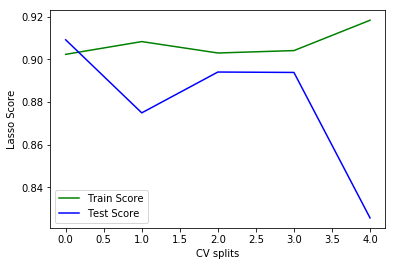

In [249]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('Lasso Score')

# KNN REGRESSOR

In [250]:
#import required packages
from sklearn import neighbors

In [251]:
parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]

grid_search = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.03964195333659018
Grid search best parameters: {'n_neighbors': 7}


In [252]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    knn = KNeighborsRegressor(grid_search.best_params_['n_neighbors'])
    knn.fit(X_train_cv,y_train_cv)
    train_score_list.append(knn.score(X_train_cv,y_train_cv))
    test_score_list.append(knn.score(X_test_cv, y_test_cv))
    
    y_preds = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for KNN Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for KNN Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge KNN Regression cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"KNN", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.8172060795028394, 0.8070844517330623, 0.8165462815463936, 0.8194011889929443, 0.812298112851025]
Test score: [0.7483082715949543, 0.7499201764536267, 0.75900092229929, 0.7568365413275453, 0.7399378743434484]
Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for KNN Regression using cross validation: 0.8145072229252529
Average testing score for KNN Regression using cross validation: 0.750800757203773
Average RMSE for Ridge KNN Regression cross validation: 0.1239531022789114


Text(0, 0.5, 'KNN Regression Score')

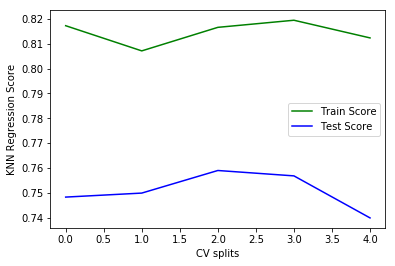

In [253]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('KNN Regression Score')

# Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression

In [254]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    lr = LinearRegression()
    lr.fit(X_train_cv,y_train_cv)
    train_score_list.append(lr.score(X_train_cv,y_train_cv))
    test_score_list.append(lr.score(X_test_cv, y_test_cv))
    
    y_preds = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Linear Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Linear Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Linear Regression using cross validation:",sum(rmse_score_list) / 5)

Train score: [0.9455001727126227, 0.952086348240194, 0.9467309012381289, 0.9449764378703988, 0.945655042225637]
Test score: [-1.3568712570147616e+20, -1.3042813875422036e+18, -1.4448611741465604e+21, -1.2848574455830657e+19, -2.669443499667587e+19]
Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for Linear Regression using cross validation: 0.9469897804573962
Average testing score for Linear Regression using cross validation: -3.242791181376171e+20
Average RMSE for Linear Regression using cross validation: 0.1239531022789114


Text(0, 0.5, 'Linear Regression Score')

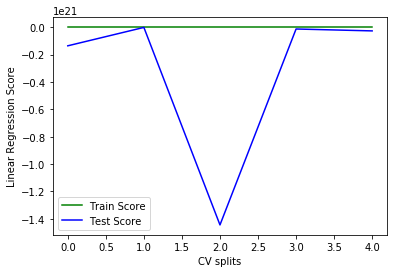

In [255]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('Linear Regression Score')

# RIDGE

In [256]:
parameters = [{'alpha':range(0,100)}]

grid_search = GridSearchCV(estimator = Ridge(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.019765575586001723
Grid search best parameters: {'alpha': 5}


In [257]:
train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
   
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    ridge = Ridge(grid_search.best_params_['alpha'])
    ridge.fit(X_train_cv,y_train_cv)
    train_score_list.append(ridge.score(X_train_cv,y_train_cv))
    test_score_list.append(ridge.score(X_test_cv, y_test_cv))
    
    y_preds = ridge.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Ridge using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Ridge using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Ridge", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9169793291926719, 0.9224071602254774, 0.9185901921286093, 0.9180952887847773, 0.929533804691048]
Test score: [0.8979951315562834, 0.8700548575481892, 0.8922141337209255, 0.8949793694346155, 0.824671708803145]
Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for Ridge using cross validation: 0.9211211550045169
Average testing score for Ridge using cross validation: 0.8759830402126317
Average RMSE for Ridge using cross validation: 0.1239531022789114


Text(0, 0.5, 'Ridge Score')

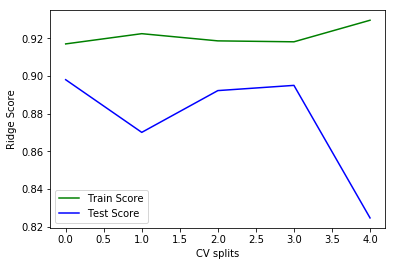

In [258]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('Ridge Score')

# LINEAR SVR

In [136]:
from sklearn.svm import LinearSVR

In [312]:
parameters = [{'C':[0.001, 0.01, 0.1, 1]}]

grid_search = GridSearchCV(estimator = LinearSVR(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.037820495721974726
Grid search best parameters: {'C': 1}


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [262]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.fit_transform(X_test_cv)
    
    lsvr = LinearSVR(grid_search.best_params_['C'])
    lsvr.fit(X_train_cv,y_train_cv)
    train_score_list.append(lsvr.score(X_train_cv,y_train_cv))
    test_score_list.append(lsvr.score(X_test_cv, y_test_cv))
    
    y_preds = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Root Mean squared error:",rmse_score_list)
print("Average training score for linear Svr using cross validation:",sum(train_score_list) / 5)
print("Average testing score for linear Svr using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for linear Svr using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Linear SVR", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757, 0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757, 0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757, 0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for Ridge using cross validation: -0.5321045875266552
Average testing score for Ridge using cross validation: -0.7478933203095666
Average RMSE for Ridge using cross validation: 0.4958124091156456


Text(0, 0.5, 'LinearSVR Score')

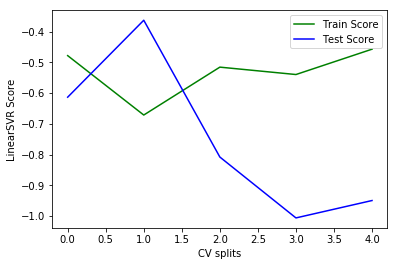

In [263]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('LinearSVR Score')

# Kernalized SVR Regression

In [146]:
from sklearn.svm import SVR

In [314]:
parameters = [{'C':[0.01, 0.1, 1, 10], 'kernel':['rbf','linear','poly'], 'gamma':[0.01, 0.1, 1, 10]}]

grid_search = GridSearchCV(estimator = SVR(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search_ksvr = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.01942154270072744
Grid search best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [315]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    ksvr = SVR(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
    ksvr.fit(X_train_cv,y_train_cv)
    train_score_list.append(ksvr.score(X_train_cv,y_train_cv))
    test_score_list.append(ksvr.score(X_test_cv, y_test_cv))
    
    y_preds_1 = ksvr.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Kernalized SVR using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Kernalized SVR using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Kernalized SVR using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Kernalized SVR", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9069406855976071, 0.9144435122536453, 0.9067585829135263, 0.9080014936702041, 0.9281280073396322]
Test score: [0.9070025562974755, 0.867908096083673, 0.903114822716157, 0.9103824676575222, 0.8031248576361459]
Root Mean squared error: [0.5446938599269212, 0.5646588462616347, 0.5586803563907081, 0.5434913822312557, 0.16329254617962757]
Average training score for Kernalized SVR using cross validation: 0.912854456354923
Average testing score for Kernalized SVR using cross validation: 0.8783065600781947
Average RMSE for Kernalized SVR using cross validation: 0.47496339819802946


Text(0, 0.5, 'Svr with kernel Score')

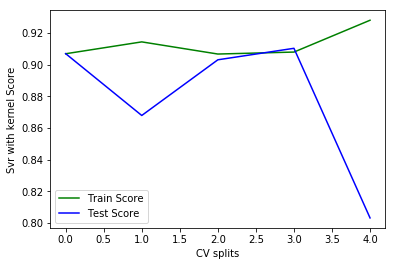

In [268]:
plt.plot(train_score_list, c = 'g', label = 'Train Score')
plt.plot(test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('Svr with kernel Score')

# Polynomial Regression

In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [278]:
def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

grid_search = GridSearchCV(PolynomialRegression(), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.02593849796914149
Grid search best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2}


In [279]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    poly = PolynomialFeatures(grid_search.best_params_['polynomialfeatures__degree'])
    X_train_poly = poly.fit_transform(X_train_cv)
    X_test_poly = poly.transform(X_test_cv)
    
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train_cv)
    train_score_list.append(lr.score(X_train_poly, y_train_cv))
    test_score_list.append(lr.score(X_test_poly, y_test_cv))
    
    y_preds = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Polynomial Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Polynomial Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Polynomial Regression using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Polynomial Regression", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [1.0, 1.0, 1.0, 1.0, 1.0]
Test score: [0.8525559968444909, 0.8631824745791966, 0.8348523209779656, 0.8629495316097495, 0.7686250064651854]
Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for Polynomial Regression using cross validation: 1.0
Average testing score for Polynomial Regression using cross validation: 0.8364330660953175
Average RMSE for Polynomial Regression using cross validation: 0.1239531022789114


# Decision Trees Regression

In [272]:
parameters = [{'max_depth':np.arange(1, 21), 'min_samples_leaf':[1, 5, 10, 20, 50, 100]}]

grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.034172395096479506
Grid search best parameters: {'max_depth': 11, 'min_samples_leaf': 10}


In [273]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    dtr = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'], min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    dtr.fit(X_train_cv,y_train_cv)
    train_score_list.append(dtr.score(X_train_cv,y_train_cv))
    test_score_list.append(dtr.score(X_test_cv, y_test_cv))
    
    y_preds = lasso.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Decision Tree Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Decision Tree Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Decision Tree Regression using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"DecisionTree", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.8970235363012055, 0.8953838417242924, 0.8926580020357934, 0.8976822756294542, 0.9024402361800345]
Test score: [0.7936117705557739, 0.7703341271169902, 0.7963198323257188, 0.8234401834264398, 0.7464044166207662]
Root Mean squared error: [0.10205318470320114, 0.13174907036690622, 0.11231259892883513, 0.11035811121598695, 0.16329254617962757]
Average training score for Decision Tree Regression using cross validation: 0.897037578374156
Average testing score for Decision Tree Regression using cross validation: 0.7860220660091379
Average RMSE for Decision Tree Regression using cross validation: 0.1239531022789114


In [138]:
pd.options.display.max_colwidth = 500

In [139]:
reporting_df.at[2, "Best Hyperparameters"] = ""

In [386]:
reporting_df

,Regressor,Avg Train Score,Avg Test Score,Avg RMSE,Best Hyperparameters
1,KNN,0.814507,0.750801,0.123953,{'n_neighbors': 7}
2,Ridge,0.921121,0.875983,0.123953,{'alpha': 5}
3,Polynomial Regression,1,0.836433,0.123953,"{'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2}"
4,DecisionTree,0.897038,0.786022,0.123953,"{'max_depth': 11, 'min_samples_leaf': 10}"
5,Linear Regression,0.946989,-3.242791,0.123953,Linear Regression(NA)
6,Linear SVR,-0.532104,-0.747893,0.495812,{'C': 1}
7,Kernalized SVR,0.912854,0.878307,0.474963,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
8,Lasso,0.90728,0.879578,0.474963,{'alpha': 0.0008}


# We can see that Avg Training Score and Testing Score for Lasso give best results and also RMSE values for both are same.
# Even though we get higher avg training score in Kernalized SVR  than Lasso but we can see we get better results for avg test score from Lasso.

# Our best Model is Lasso and Best Alpha value is 0.0008

# We will see our predicted values for Kernalized SVR as we can see from above dataframe that Kernalised SVR works best for us.

In [387]:
print(y_preds_las)

[12.1792912  13.19379392 11.9179617  12.03804744 12.0122655  12.26772053
 12.27751622 12.65540531 11.76593868 11.68126942 11.83153162 11.42866541
 12.37530532 12.48337657 13.24336521 11.8929478  12.18469567 11.74771426
 11.58875222 12.43586018 12.14243702 12.16980313 12.04429363 12.06353061
 11.70001517 11.93744132 11.89792985 12.03177884 12.35636683 11.8692405
 12.08937946 11.82896228 11.48509897 12.17044825 11.76220365 12.18936175
 11.89431402 12.4796449  11.54703354 12.25438648 11.87028648 12.60376004
 12.16119738 12.25610287 11.45757532 11.78507821 11.72040191 11.64742166
 11.82692077 12.35640281 11.17502156 11.41498163 11.56258145 11.7349834
 11.95355583 11.80436532 12.21535238 11.85706776 12.34654751 11.9183749
 12.71130157 11.78903106 12.21992976 11.80655582 11.619131   11.76398327
 11.50280324 11.79445669 12.08954479 12.28930932 11.8383479  12.3320679
 12.26639055 12.46991092 12.08542717 12.96784896 12.23438953 12.17515111
 12.21719346 11.90123534 11.80319473 11.70274858 12.463

# Now we will have to take the antilog for our predicted values as we log transformed the values to get a normal distribution.

## Now to get our predicted prices we take antilog for predictions.

In [388]:
predictions_Lasso = np.exp(y_preds_las)

In [389]:
print(predictions_ksvr)

[ 184519.6229702   529661.51660475  151584.67714092  162609.99627371
  164219.17494389  217119.61159469  211778.72848329  300248.21400616
  125788.34526252  118737.56922596  141053.84261055   83968.37166622
  226489.26365409  269978.5697892   530095.6180529   139742.47933606
  199207.81381594  128419.5516713    99772.38575687  240925.33451273
  185403.15910073  186787.12525249  189989.56872367  169474.95317245
  124962.15366535  157855.58415399  149289.47392093  169989.81013372
  224091.56955731  144709.10961303  178717.24893027  135679.99040887
   98952.29164665  189106.90713087  132051.56346926  194674.5106357
  147066.15640038  238913.24575106  116249.2607734   210566.03137031
  130710.31717882  306184.31086405  199841.49192912  217954.05776754
   91729.93429509  130182.62908314  127321.79333554  113142.29323174
  117611.94048601  231050.87575512   66815.94574808   87358.64624658
  100135.97703434  123023.06436475  156500.13014048  129405.68107015
  197894.5566172   136693.84827474 